In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("cleaned_merged_heart_dataset.csv")




(1888, 14)


<Axes: >

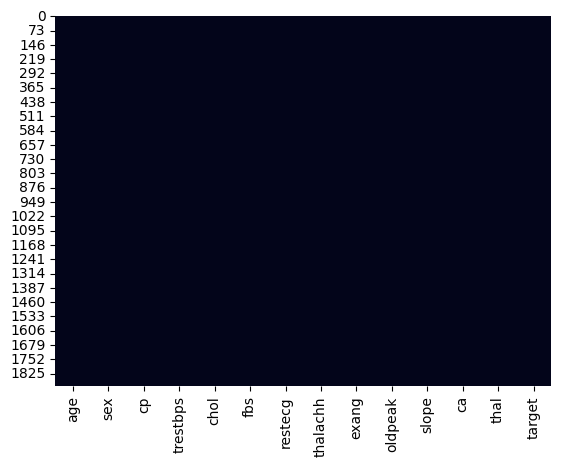

In [ ]:
# feature engineering

#print the dataset shape


print(data.shape)
#plot the NaN values with a heatmap
sns.heatmap(data.isnull(), cbar=False)







#####  HeatMap pour visualise les donnees manquantes:

aucune donnee manquante vu que j'ai upload un fichier cleaned

<Axes: xlabel='age', ylabel='Count'>

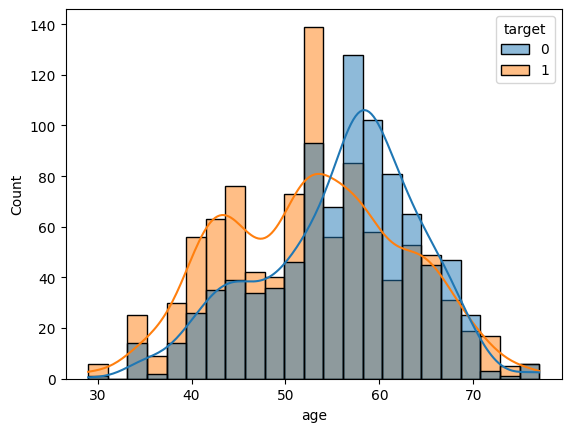

In [13]:
#print the histogram of the age column selon la mortalite 

sns.histplot(data=data, x='age', hue='target', kde=True)


In [ ]:
# using pca to reduce the dimensionality of the dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#standardize the data
scaler = StandardScaler()
X = data.drop('target', axis=1)
y = data['target']
X = scaler.fit_transform(X)

#apply pca
pca = PCA()
X_pca = pca.fit_transform(X)



Text(0.5, 0, 'First principal component')

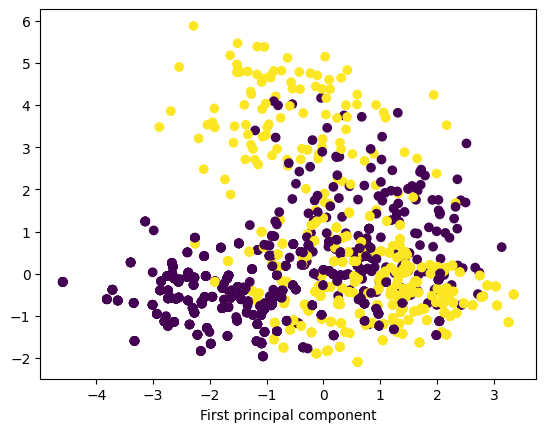

In [19]:
# afficher les deux composantes principales

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['target'])
plt.xlabel('First principal component')

In [20]:
pca.explained_variance_ratio_

array([0.18996057, 0.12213479, 0.11222833, 0.0871982 , 0.07847079,
       0.07136409, 0.065773  , 0.06103029, 0.05944449, 0.04911558,
       0.0377089 , 0.03302431, 0.03254668])

In [ ]:
# dispatcher les donnees en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# utilisation de l'algorithme RandomForestClassifier pour predire la mortalite


cls = RandomForestClassifier(n_estimators=100, random_state=42)
# entraienr le modele
cls.fit(X_train, y_train)

y_pred = cls.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

